In [5]:
#!/usr/bin/env python3
# 2D animation using rotation matrix

from utils.utils import preprocess_watch_data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from math import sin,cos
from numpy import random
from utils.utils import make_cartesian_axes
import seaborn as sns

df = preprocess_watch_data("data/2021-11-29_12_48_45_Andrew’s Apple Watch.csv")
omega = df['gyr_z']
time = df['gyr_t']
thetas = [0]
Rs = [np.eye(2,2)]
vectors = [np.array([1,0]).T]
def get_theta(n):
    return omega[n]*(time[n]-time[n-1])+thetas[n-1]
def get_rotation_matrix(theta):
    return np.array([[cos(theta),-sin(theta)],
                     [sin(theta),cos(theta)]])
def get_rotated_basis(basis,R):
    return R @ basis

In [6]:
for i,_ in enumerate(time):
    if (i==0):
        # don't have delta t, next
        continue
    theta = get_theta(i)
    R = get_rotation_matrix(theta)
    Rs.append(R)
    vectors.append(get_rotated_basis(vectors[0],R))
    thetas.append(theta)

0 [1 0]
0 [1 0]
0 [1 0]
1 [9.99999995e-01 1.03207219e-04]
2 [9.99999997e-01 7.37665214e-05]
3 [ 9.99999843e-01 -5.60830202e-04]
4 [ 9.99999994e-01 -1.06632494e-04]
5 [9.99999972e-01 2.36382751e-04]
6 [9.99999965e-01 2.65687781e-04]
7 [9.99999931e-01 3.71322439e-04]
8 [9.99999929e-01 3.76975425e-04]
9 [9.99999950e-01 3.17710663e-04]
10 [9.99999974e-01 2.27358165e-04]
11 [9.99999987e-01 1.60383813e-04]
12 [1.00000000e+00 1.65002701e-05]
13 [ 9.99999980e-01 -2.02011261e-04]
14 [ 9.99999915e-01 -4.12915763e-04]
15 [ 9.99999920e-01 -4.01157428e-04]
16 [ 9.99999936e-01 -3.57532813e-04]
17 [ 9.99999934e-01 -3.63141507e-04]
18 [ 9.99999931e-01 -3.70523280e-04]
19 [ 9.99999930e-01 -3.73093926e-04]
20 [ 9.99999942e-01 -3.41653778e-04]
21 [ 9.99999926e-01 -3.85298939e-04]
22 [ 9.99999924e-01 -3.90588743e-04]
23 [ 9.99999929e-01 -3.77483539e-04]
24 [ 9.99999921e-01 -3.98195140e-04]
25 [ 9.99999920e-01 -3.99786622e-04]
26 [ 9.99999922e-01 -3.93851073e-04]
27 [ 9.99999912e-01 -4.20131989e-04]
28 [ 9

<Figure size 432x288 with 0 Axes>

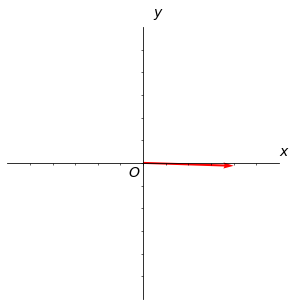

In [7]:

fig, ax = make_cartesian_axes()
tail = [0,0]
Q = ax.quiver(*tail,*vectors[0],scale=3,color=['r'])

def update_quiver(num):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    
    print(num,vectors[num])

    Q.set_UVC(*vectors[num])

    return Q,


anim = animation.FuncAnimation(fig, update_quiver,
                               frames=len(time), interval=1, blit=True)


anim.save('basic_animation.mp4', fps=100, extra_args=['-vcodec', 'libx264'])
